<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment1/36106-AT1-24898381-experiment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

Training data

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1-IlfTscbeco2Mxn6e_Hu5yAP9qhckSJH'
df_train = pd.read_csv(file_url)
df_train.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.8,2009,84.0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,988334,m,1990-05-15,57.0,2010,64.5,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


Vaidation data

In [4]:
file_url_val = 'https://drive.google.com/uc?export=download&id=1_y3VAvfu58ebeAByXY5JaV1_k3pXAZtJ'
df_val = pd.read_csv(file_url_val)
df_val.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1049856,m,1992-11-08,80.00,2010,85.6,14382,2,B.Tech/B.E.,information technology,90.1,14382,1,2014,490,555,465,0.996744,615,-1,623,-1,-1,-1,-1,-0.0154,0.5454,0.3174,-1.3753,-0.2859,355000
1,445828,m,1992-03-25,78.93,2009,70.8,13210,2,B.Tech/B.E.,electronics and communication engineering,65.0,13210,0,2013,385,375,575,0.824666,395,400,-1,-1,-1,366,-1,-0.5719,0.5008,-0.6343,0.4148,-0.1690,240000


testing data

In [5]:
file_url_test = 'https://drive.google.com/uc?export=download&id=1-GviBcJoaYHdwCjXvsg2zMdOAGiPsNb7'
df_test = pd.read_csv(file_url_test)
df_test.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1066913,m,1993-05-03,75.0,2010,60.40,13599,2,B.Tech/B.E.,electrical engineering,72.0,13599,1,2014,350,445,510,0.557390,-1,324,-1,-1,420,-1,-1,-0.5116,-1.6191,-0.7585,-0.1076,-0.2511,120000
1,1258784,m,1993-01-20,97.0,2010,95.08,566,2,B.Tech/B.E.,electronics and communication engineering,89.0,566,0,2014,440,395,545,0.493596,355,324,-1,-1,-1,-1,-1,1.4208,0.7119,-0.7585,-1.6289,-0.8608,200000


### 2. Explore Dataset

In [6]:
df = df_train.copy(deep=True)

In [7]:
df.isnull().sum()

id                       0
gender                   0
dob                      0
10percentage             0
12graduation             0
12percentage             0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
salary                   0
dtype: int64

calculate the age of each person

In [8]:
df['dob'] = pd.to_datetime(df['dob'])

df['age'] = df['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))


In [9]:
df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)


In [10]:
df.dtypes

id                               object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
12graduation                      int64
12percentage                    float64
collegeid                        object
collegetier                      object
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                    object
collegecitytier                  object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64
computerscience                   int64
mechanicalengg                    int64
electricalengg                    int64
telecomengg                       int64
civilengg                         int64


In [11]:
df.describe(include='all')

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age
count,2998,2998,2998,2998.000000,2998.000000,2998.000000,2998,2998,2998,2998,2998.000000,2998,2998,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000
unique,2998,2,NaN,NaN,NaN,NaN,1173,2,4,42,NaN,1173,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,604399,m,NaN,NaN,NaN,NaN,272,2,B.Tech/B.E.,electronics and communication engineering,NaN,272,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2282,NaN,NaN,NaN,NaN,67,2772,2757,670,NaN,67,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1990-12-06 14:02:00.080053376,77.666264,2008.080720,74.341061,NaN,NaN,NaN,NaN,71.509857,NaN,NaN,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05,32.795530
min,NaN,NaN,1981-05-06 00:00:00,43.000000,1998.000000,40.000000,NaN,NaN,NaN,NaN,6.630000,NaN,NaN,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04,26.000000
25%,NaN,NaN,1989-11-11 06:00:00,71.140000,2007.000000,66.000000,NaN,NaN,NaN,NaN,66.530000,NaN,NaN,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05,32.000000
50%,NaN,NaN,1991-03-05 00:00:00,78.965000,2008.000000,74.000000,NaN,NaN,NaN,NaN,71.800000,NaN,NaN,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05,33.000000
75%,NaN,NaN,1992-03-09 18:00:00,85.600000,2009.000000,82.600000,NaN,NaN,NaN,NaN,76.300000,NaN,NaN,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05,34.000000
max,NaN,NaN,1997-05-27 00:00:00,97.760000,2012.000000,98.700000,NaN,NaN,NaN,NaN,99.930000,NaN,NaN,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06,42.000000


Detect and remove outliers in the target variable using the z_score method

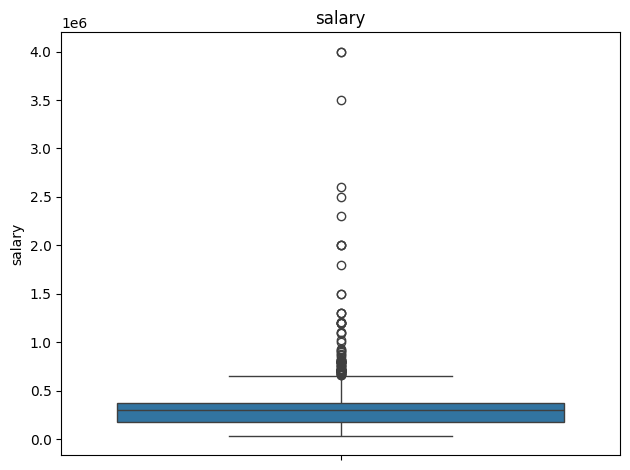

In [12]:
sns.boxplot(y=df[df['salary'] != -1]['salary'])
plt.title('salary')

plt.tight_layout()
plt.show()

In [13]:
df['z_score'] =zscore(df['salary'])

In [14]:
z_score_treshold = 4

outliers = df[(df['z_score'].abs() > z_score_treshold)].shape[0]

df = df[(df['z_score'].abs() <= z_score_treshold)]
df.drop('z_score', axis = 1, inplace = True)

<ipython-input-14-de416853b99d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('z_score', axis = 1, inplace = True)


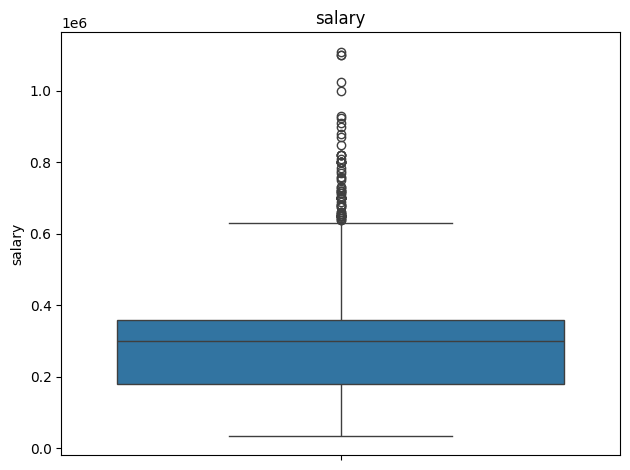

In [15]:
sns.boxplot(y=df[df['salary'] != -1]['salary'])
plt.title('salary')

plt.tight_layout()
plt.show()

numerical data distribution

<Figure size 1000x600 with 0 Axes>

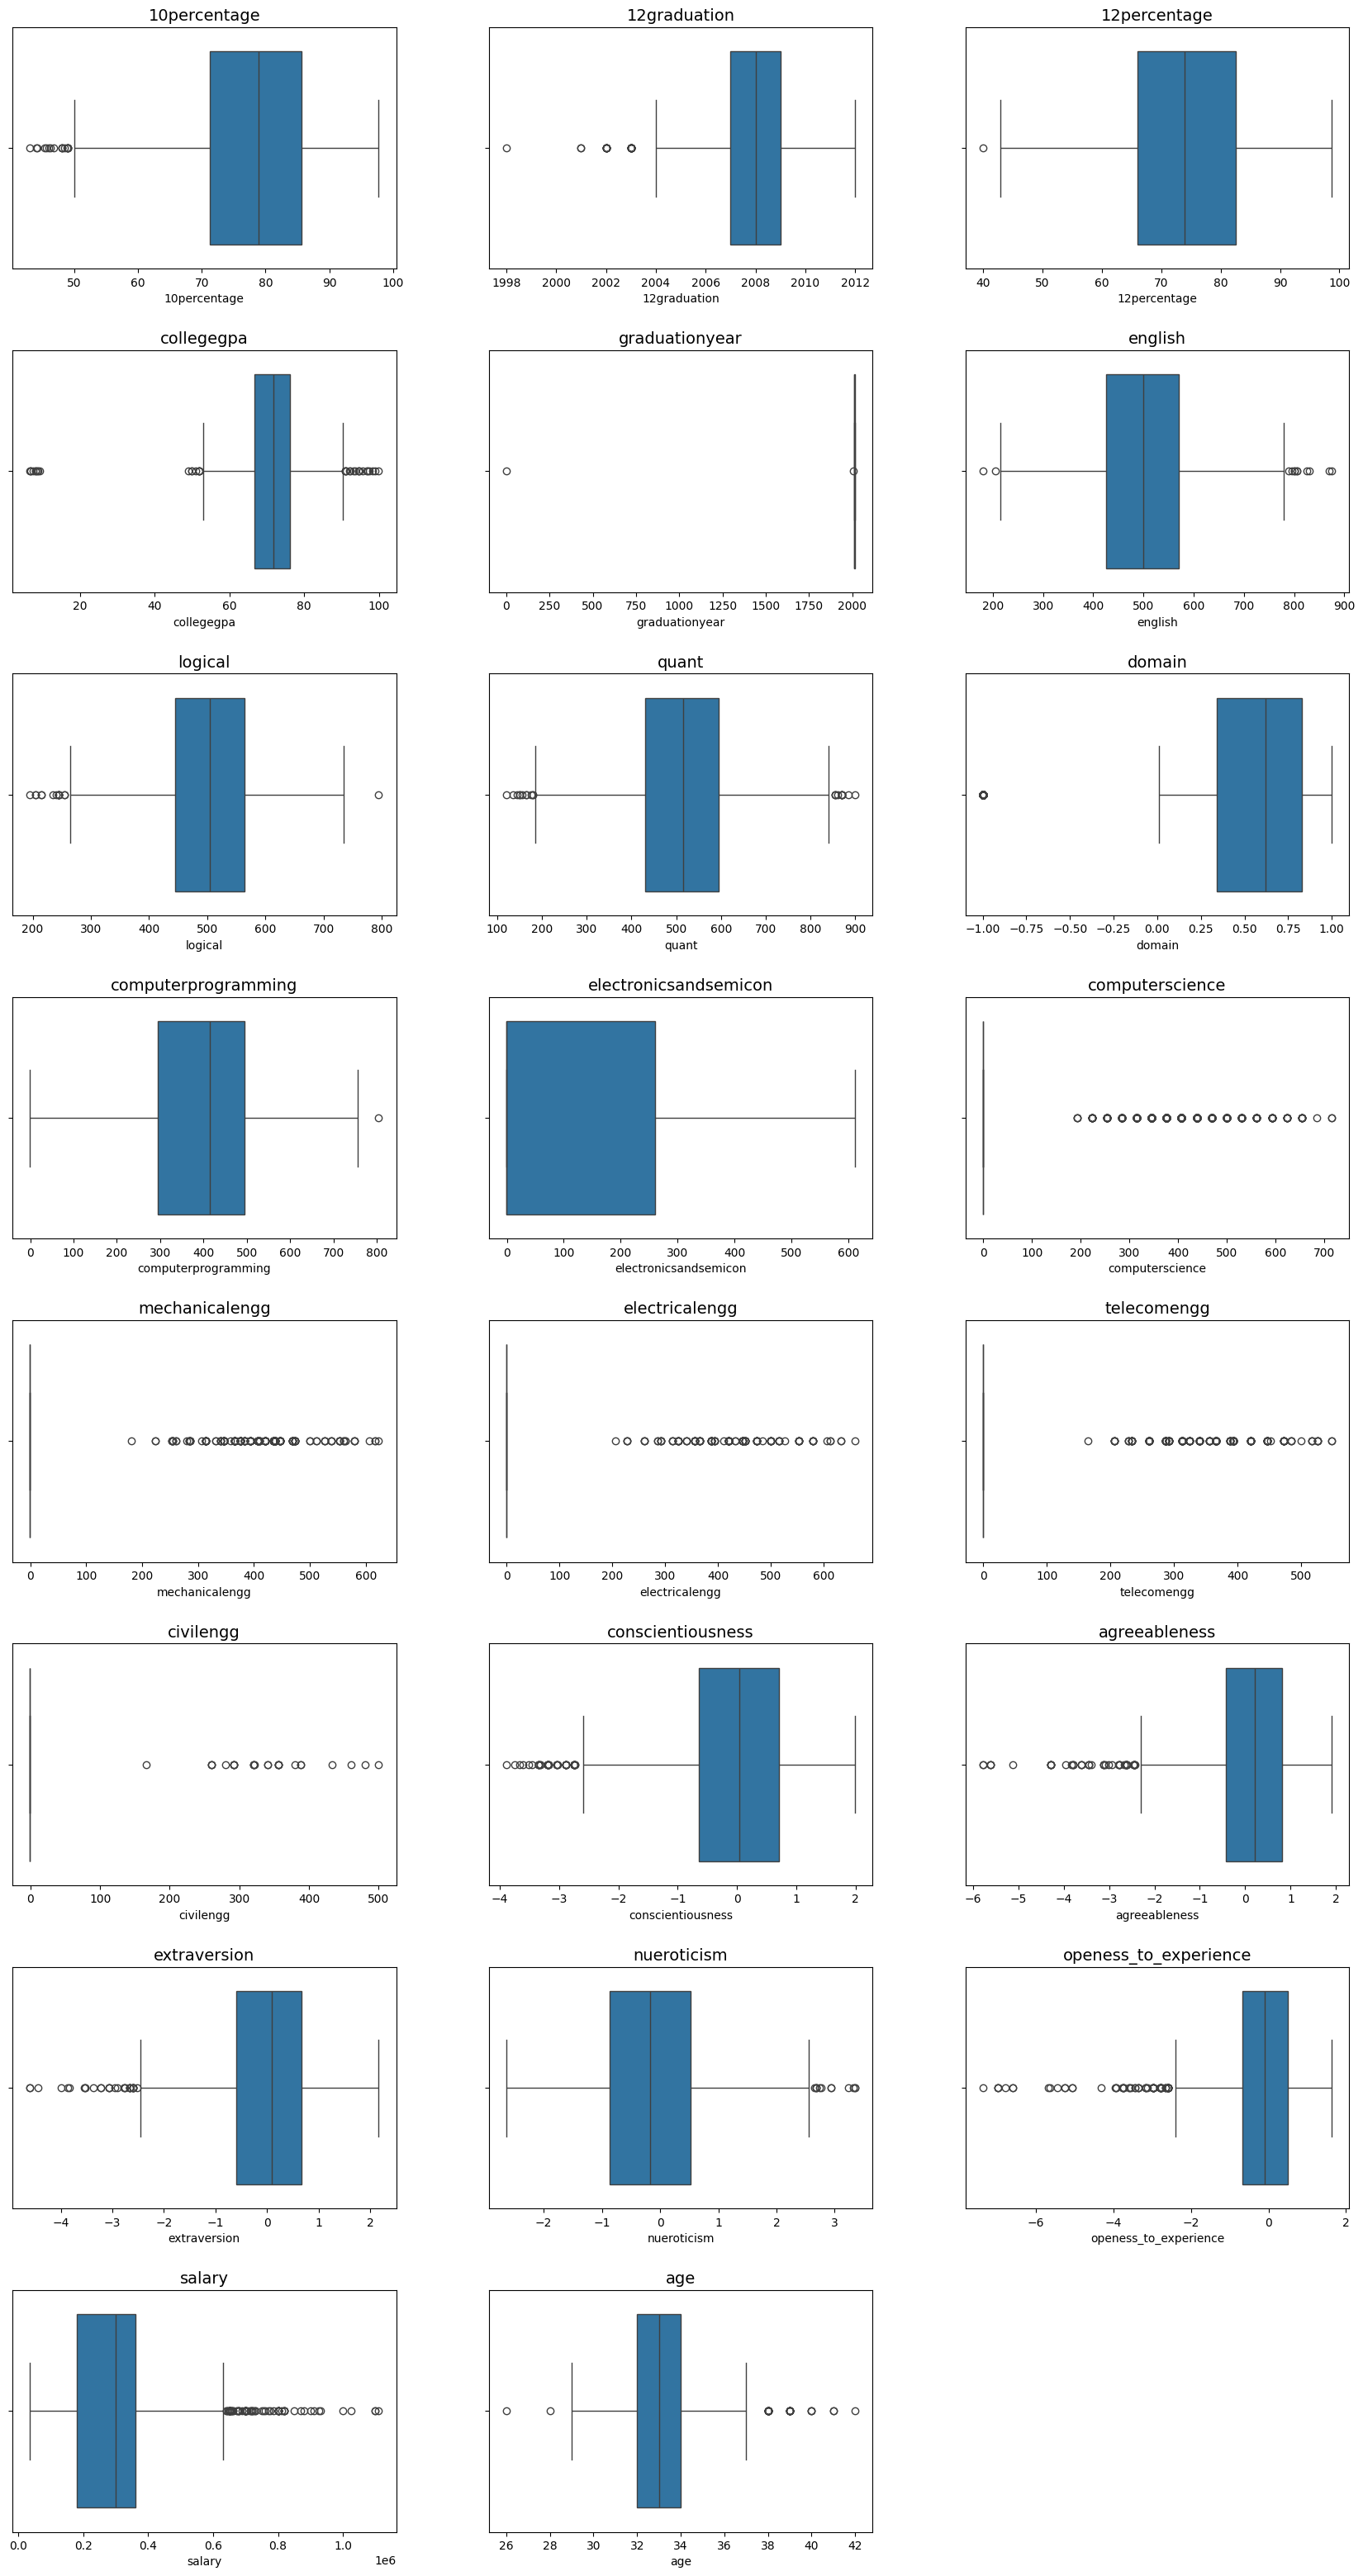

In [16]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))

n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=df_numeric[col], ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col, fontsize=14)

# Ocultar gráficos vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

notes after the boxplots and the statistic descrive:
* `graduation year` have a 0 value needs to be removed
*  `collegegpa` seems to have some really low values, below 20. Further inspection needed
* `domain` had on -1 value, need to be removed
* `computerprogramming`,	`electronicsandsemicon`,	`computerscience`,	`mechanicalengg`,	`electricalengg`,	`telecomengg` and `civilengg` columns need further exploration about the -1 one values and without those values.

Column inspection by the distribution

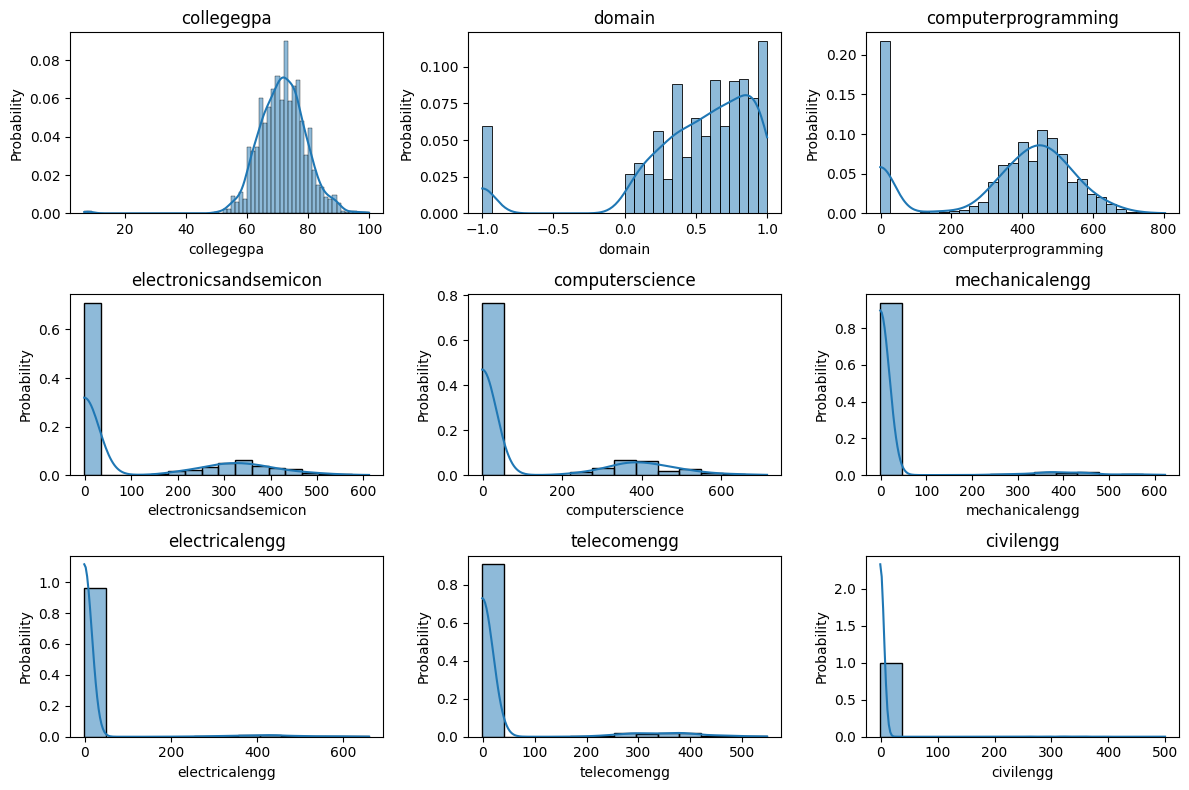

In [17]:
cols_to_plot = [
    'collegegpa','domain','computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]


plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, stat='probability')
    plt.title(col)

plt.tight_layout()
plt.show()

In [18]:
cols_to_plot = [
    'computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]
for i in cols_to_plot:
  value = len(df[i][df[i] == -1]) / len(df[i])
  print(f'For the col {i}, {round(value*100,2)}% of the data are -1')


For the col computerprogramming, 21.73% of the data are -1
For the col electronicsandsemicon, 71.08% of the data are -1
For the col computerscience, 76.62% of the data are -1
For the col mechanicalengg, 93.85% of the data are -1
For the col electricalengg, 95.9% of the data are -1
For the col telecomengg, 90.8% of the data are -1
For the col civilengg, 99.13% of the data are -1


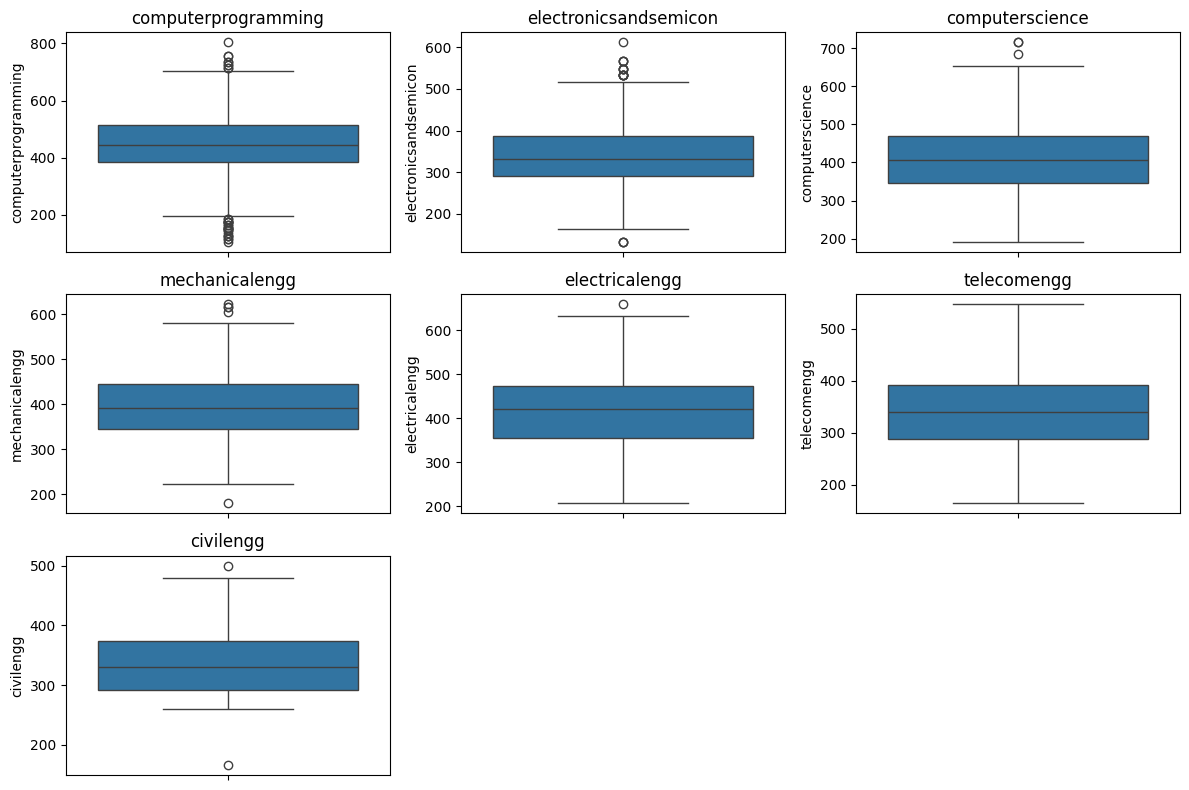

In [19]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[df[col] != -1][col])
    plt.title(col)

plt.tight_layout()
plt.show()

notes:

* `civilengg` has to many -1, consider to drop it, same for the `electricalengg` and the `mechanicalengg` column

numercial columns cleaning

In [20]:
df = df[(df['graduationyear'] != 0) & (df['collegegpa'] >= 20) & (df['domain'] != -1)]


correlation map between numerical variables

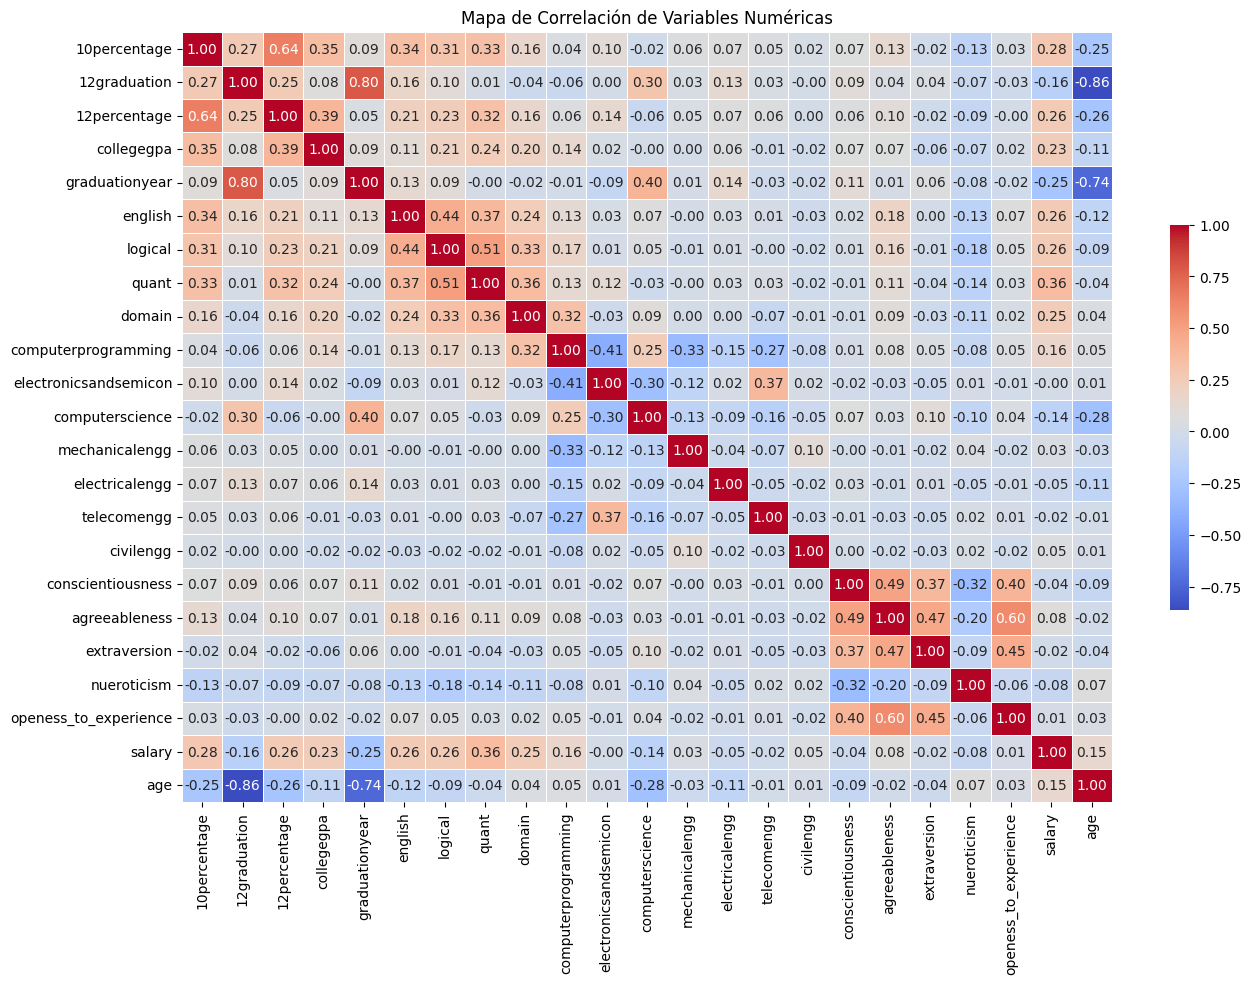

In [21]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

droped columns due correlation:

1) `12graduation`, `graduationyear` are correlated with `age`

2) `10percentage` is correlated with `12peercentage`

categorical variables distribution

In [22]:
df[df['specialization'].str.contains('&|and', na=False)]['specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications',
       'electronics and communication engineering',
       'computer science and technology',
       'electronics and electrical engineering',
       'electronics & instrumentation eng',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation',
       'electronics and computer engineering',
       'mechanical and automation', 'industrial & management engineering',
       'industrial & production engineering',
       'information & communication technology'], dtype=object)

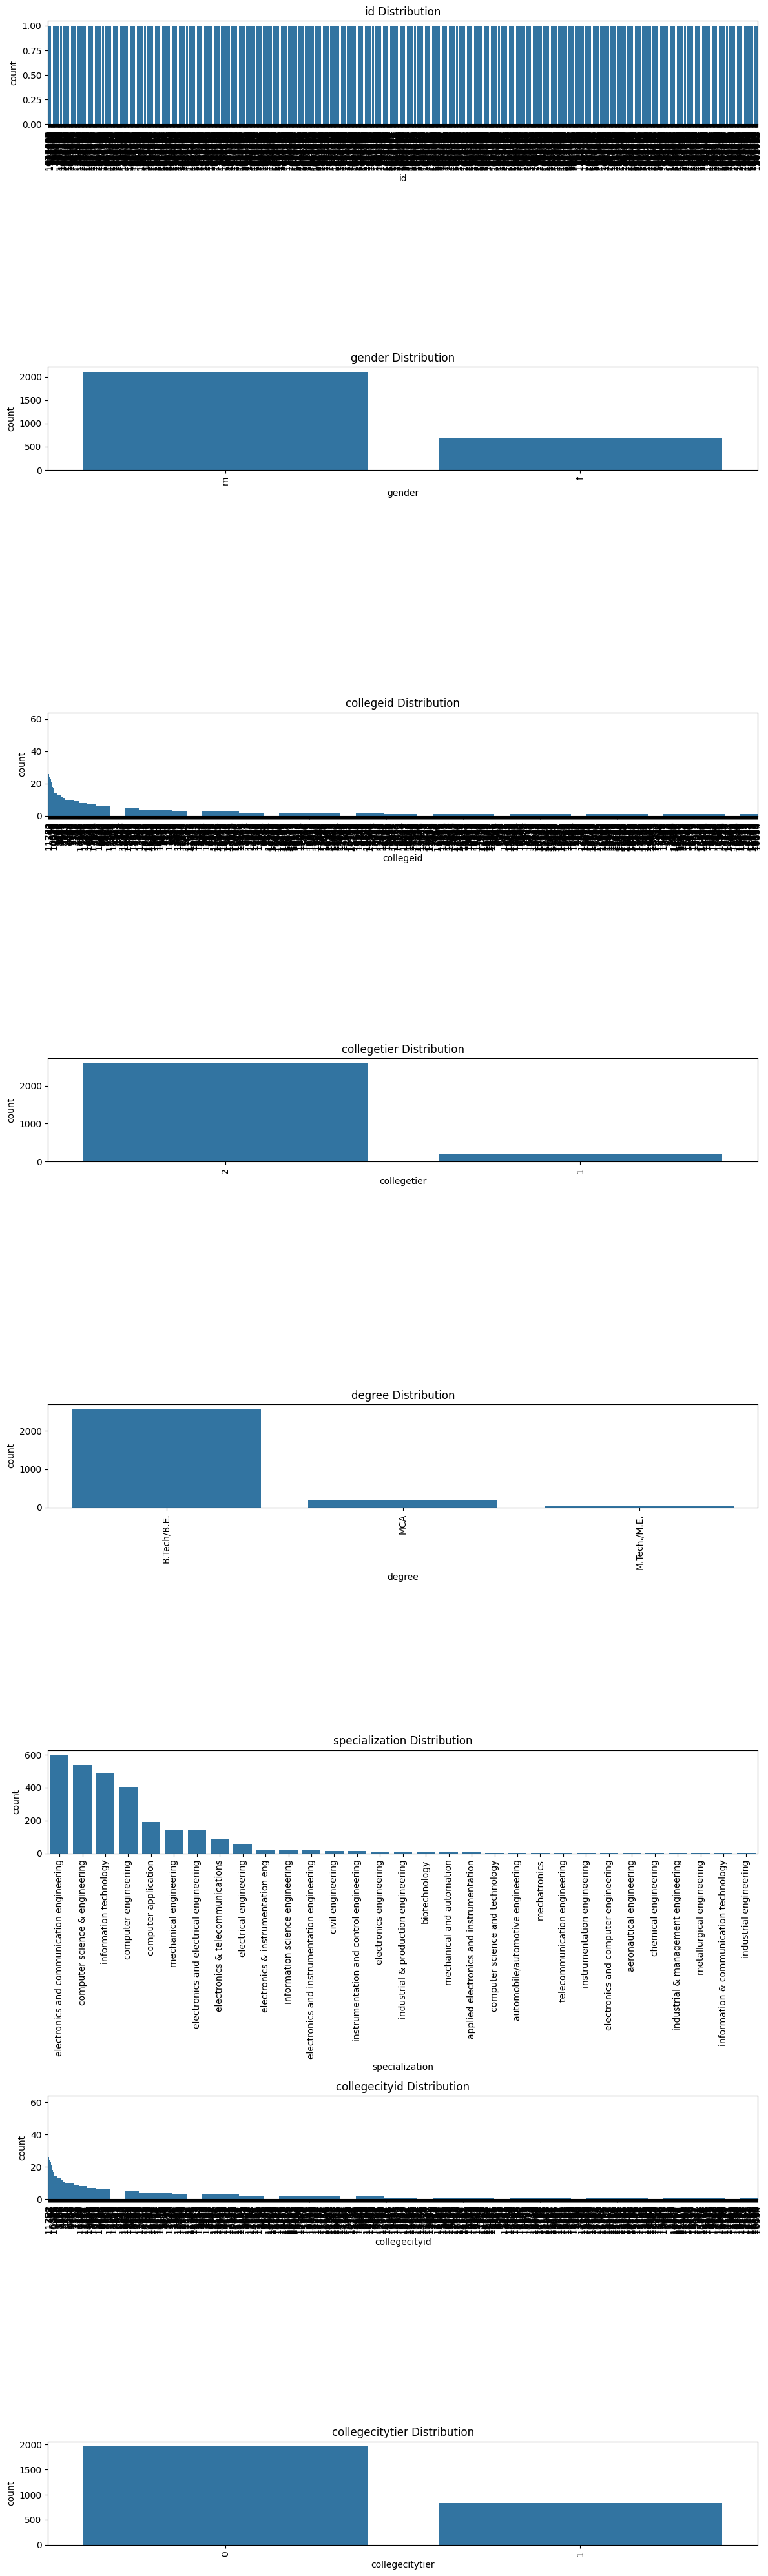

In [23]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



`collegeid` and `collegecityid` have to many unique values

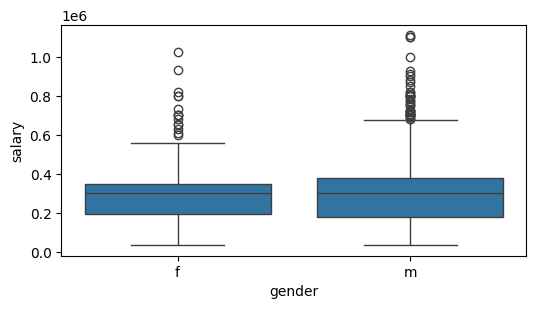

In [24]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='gender', y='salary', data=df)


plt.show()

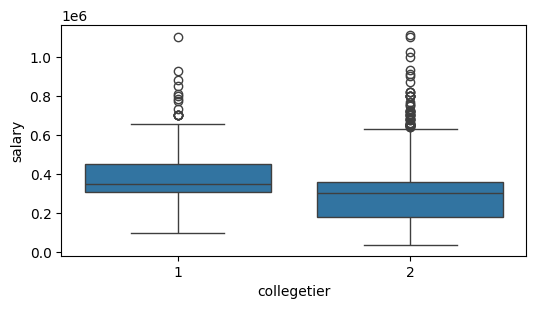

In [25]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='collegetier', y='salary', data=df)

plt.show()

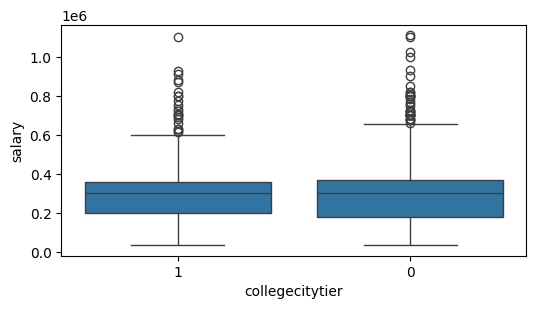

In [26]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='collegecitytier', y='salary', data=df)

plt.show()

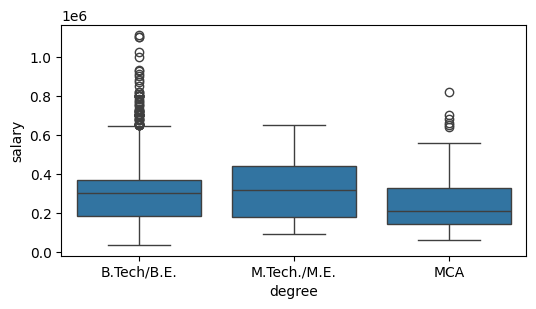

In [27]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='degree', y='salary', data=df)


plt.show()

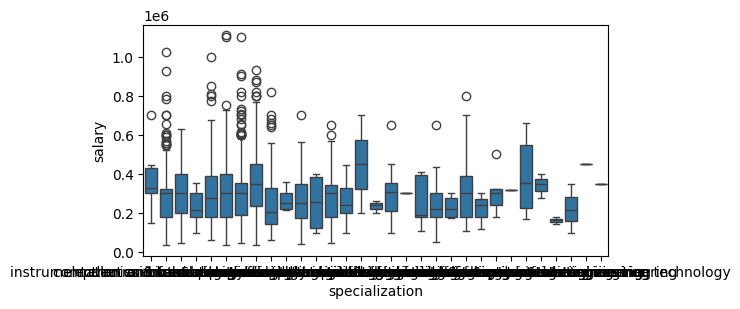

In [28]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='specialization', y='salary', data=df)


plt.show()

In [29]:
df.drop(columns=['id','collegeid','collegecityid'], inplace= True)

Use ANOVA to check the relationship between categorical variables with salary

In [30]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

resultados = []

for col in columnas_categoricas:
    if col != 'salary':
        formula = f'salary ~ C({col})'
        modelo = ols(formula, data=df).fit()
        tabla_anova = sm.stats.anova_lm(modelo, typ=2)

        f_value = tabla_anova['F'][0]
        p_value = tabla_anova['PR(>F)'][0]

        resultados.append({'Variable': col, 'F-Value': f_value, 'P-Value': p_value})

resultados_anova = pd.DataFrame(resultados)

resultados_anova.sort_values(by='P-Value', inplace=True)

print(resultados_anova)


          Variable     F-Value       P-Value
1      collegetier  104.937192  3.366006e-24
3   specialization    4.370627  3.381307e-14
2           degree    8.043168  3.288079e-04
0           gender    5.183193  2.288187e-02
4  collegecitytier    0.709743  3.996013e-01


In [31]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = df.select_dtypes(include=[np.number])

#df_numeric = df_numeric.apply(lambda x: x.fillna(x.mean()),axis=0)

df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).apply(lambda x: x.fillna(x.mean()),axis=0)

df_numeric_with_const = add_constant(df_numeric)

vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_with_const.values, i) for i in range(df_numeric_with_const.shape[1])]

print(vif_data)

                 Variable           VIF
0                   const  8.950423e+06
1            10percentage  2.004210e+00
2            12graduation  5.413036e+00
3            12percentage  2.029408e+00
4              collegegpa  1.326630e+00
5          graduationyear  3.548816e+00
6                 english  1.441627e+00
7                 logical  1.591335e+00
8                   quant  1.659513e+00
9                  domain  1.361582e+00
10    computerprogramming  1.912216e+00
11  electronicsandsemicon  1.622553e+00
12        computerscience  1.448444e+00
13         mechanicalengg  1.363817e+00
14         electricalengg  1.125742e+00
15            telecomengg  1.222575e+00
16              civilengg  1.024922e+00
17      conscientiousness  1.548390e+00
18          agreeableness  1.989353e+00
19           extraversion  1.438341e+00
20            nueroticism  1.193902e+00
21  openess_to_experience  1.721381e+00
22                 salary  1.416804e+00
23                    age  4.126285e+00


as previous seen in the correlation heat map, age, 12graduation and graduationyear are highly correlated.

In [32]:
from sklearn.ensemble import RandomForestRegressor

X = df.select_dtypes(include=['float64', 'int64'])
y = df['salary']

X = X.drop(columns=['salary'], errors='ignore')

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X, y)

importancias_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancias_rf

,Variable,Importancia
7,quant,0.156177
3,collegegpa,0.083208
4,graduationyear,0.078063
0,10percentage,0.076817
2,12percentage,0.070272
5,english,0.065962
9,computerprogramming,0.063407
6,logical,0.054167
19,nueroticism,0.047844
8,domain,0.044258


In [33]:
from sklearn.feature_selection import VarianceThreshold

In [34]:
df_numeric = df.select_dtypes(include=[np.number])

selector = VarianceThreshold(threshold=0.01)
selector.fit(df_numeric)
columns_to_remove = df_numeric.columns[~selector.get_support()]

variance = df_numeric.var()

df_variance = pd.DataFrame({'Column': variance.index, 'variance': variance.values})

In [35]:
df_variance.sort_values(by='variance')

,Column,variance
8,domain,7.479438e-02
17,agreeableness,9.063745e-01
18,extraversion,9.243571e-01
19,nueroticism,1.022982e+00
20,openess_to_experience,1.035159e+00
16,conscientiousness,1.049545e+00
4,graduationyear,1.684829e+00
1,12graduation,2.638221e+00
22,age,2.996811e+00
3,collegegpa,5.402164e+01


In [36]:
df.drop(columns=['domain','agreeableness'], inplace = True)

### 3. Explore Target variable

In [37]:
target = 'salary'

In [38]:
df[target]

0       445000
1       110000
2       255000
3       420000
4       200000
         ...  
2993    120000
2994    120000
2995    385000
2996    530000
2997    200000
Name: salary, Length: 2789, dtype: int64

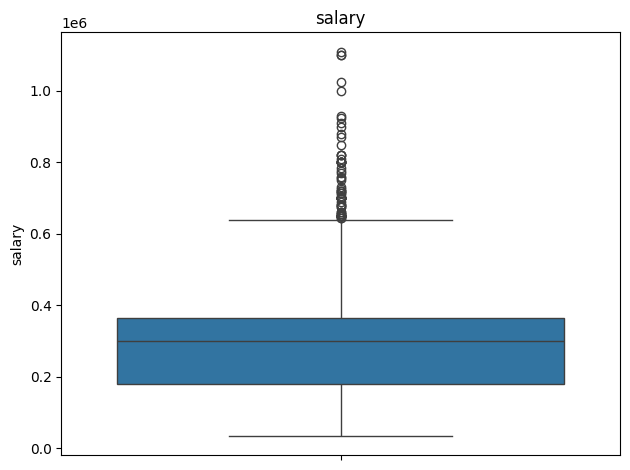

In [39]:
sns.boxplot(y=df[df[target] != -1][target])
plt.title(target)

plt.tight_layout()
plt.show()

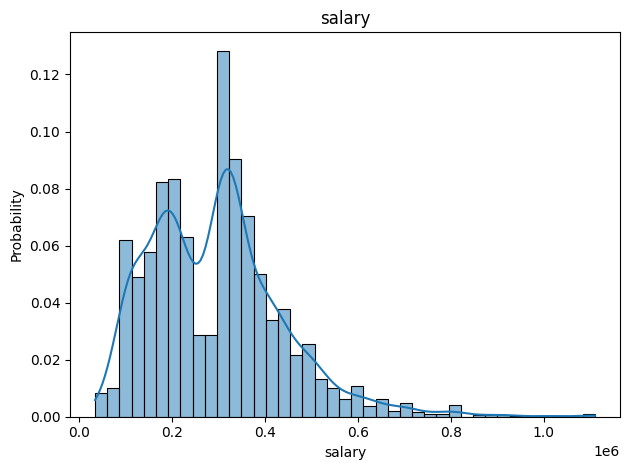

In [40]:
sns.histplot(df[target], kde=True, stat='probability')
plt.title(target)
plt.tight_layout()
plt.show()

### 4. Explore Variables of Interest

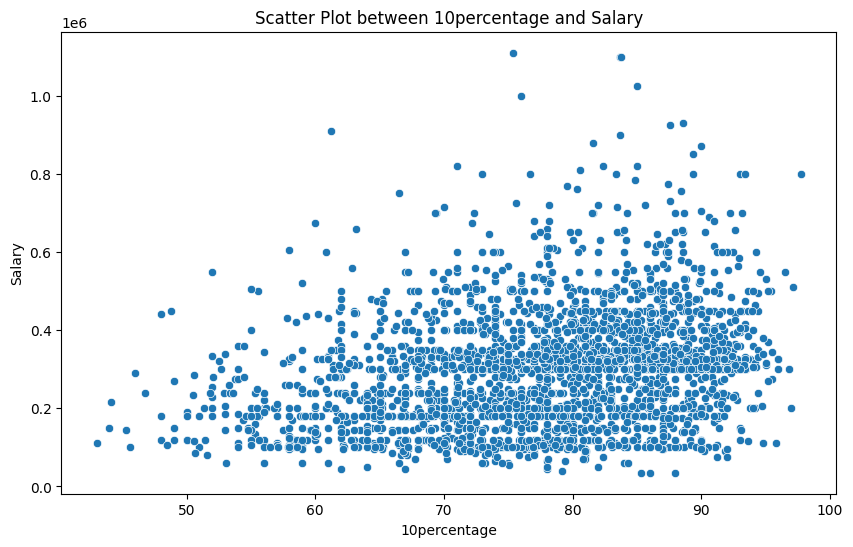

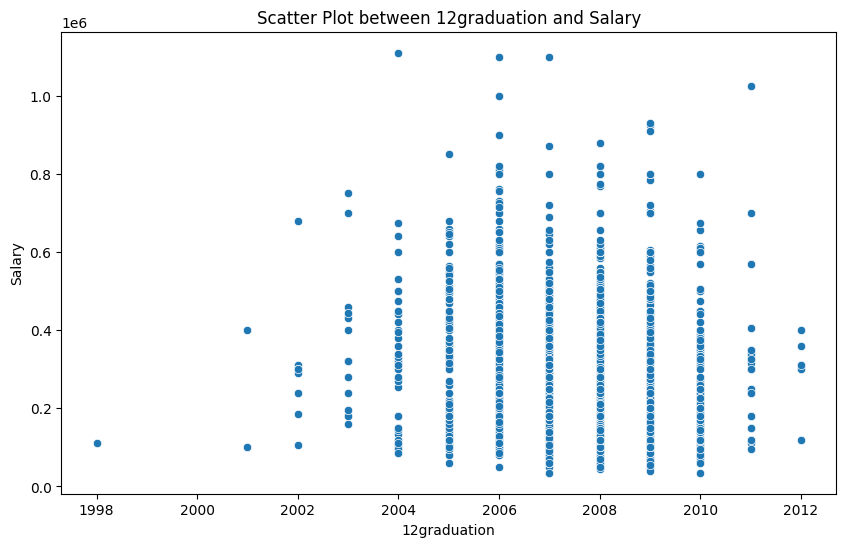

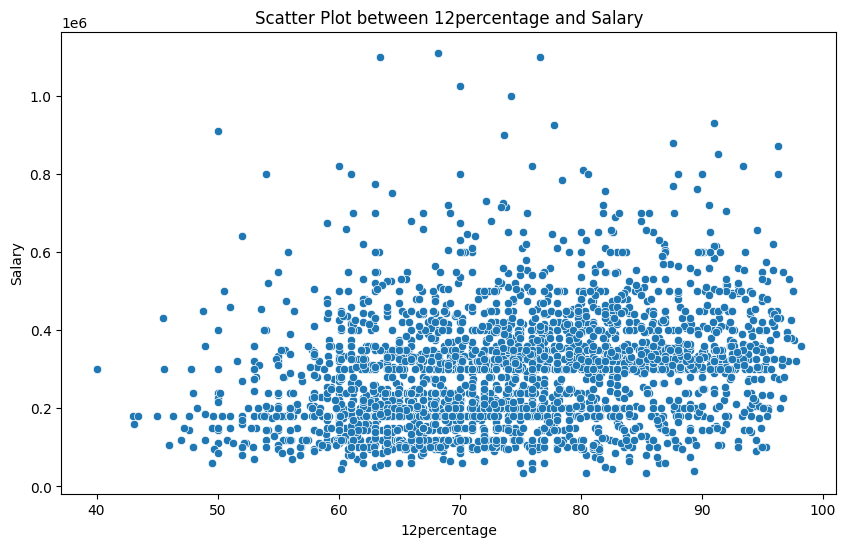

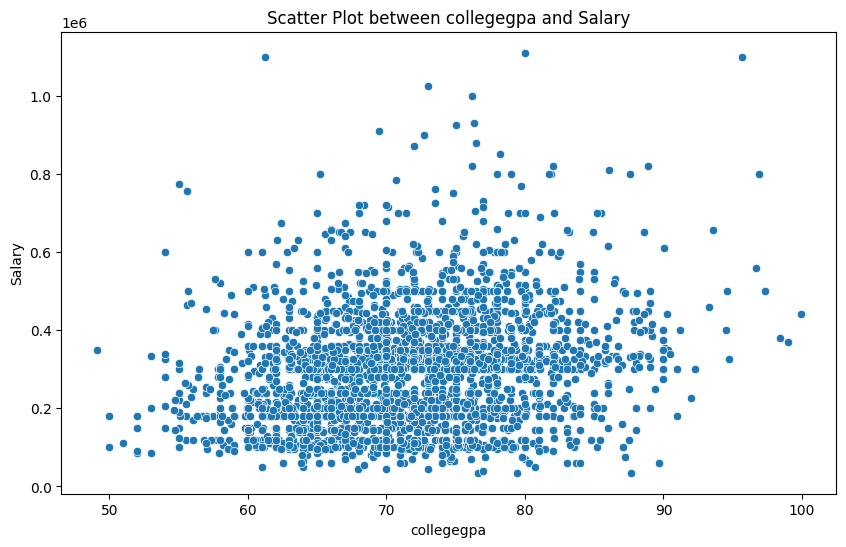

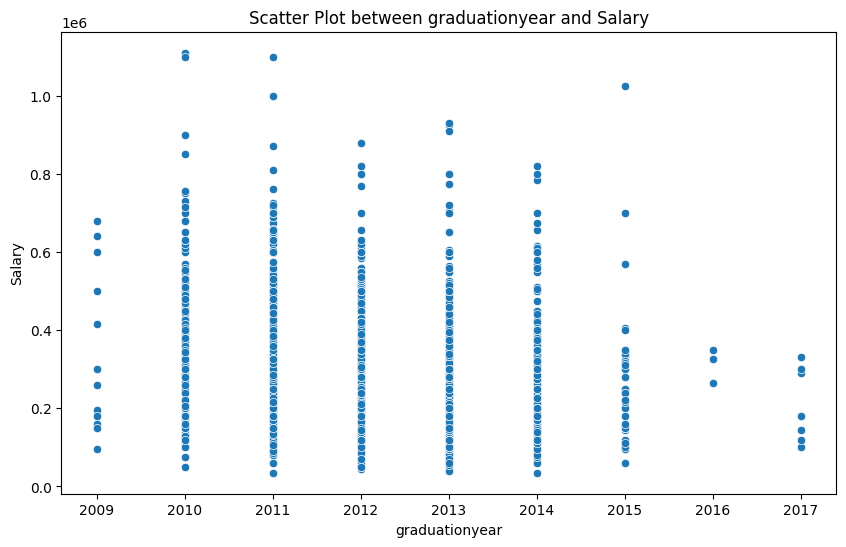

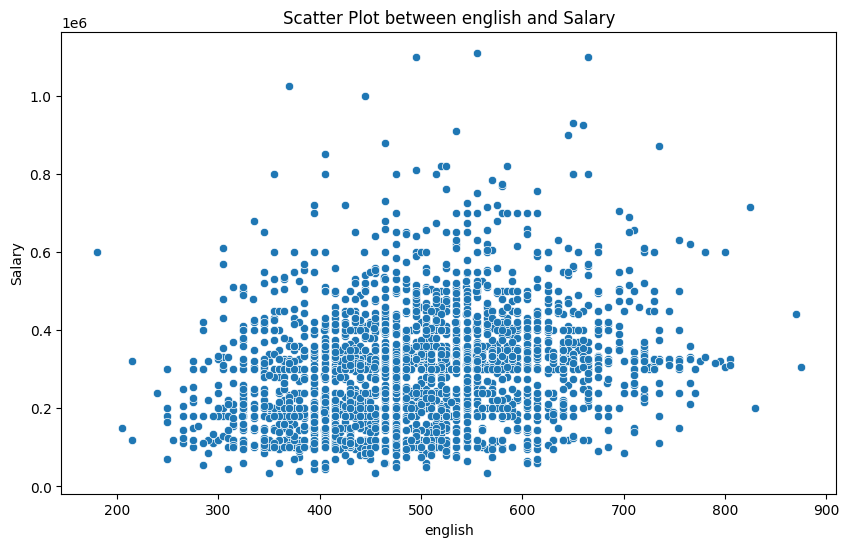

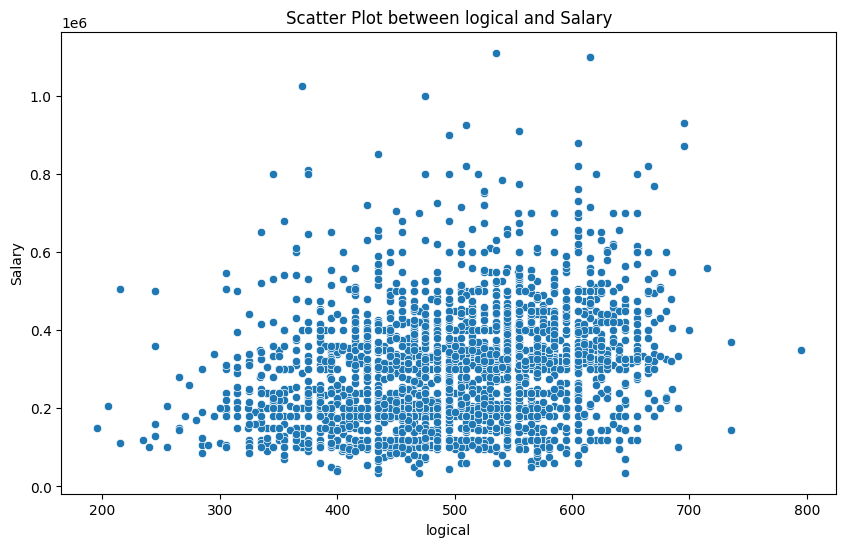

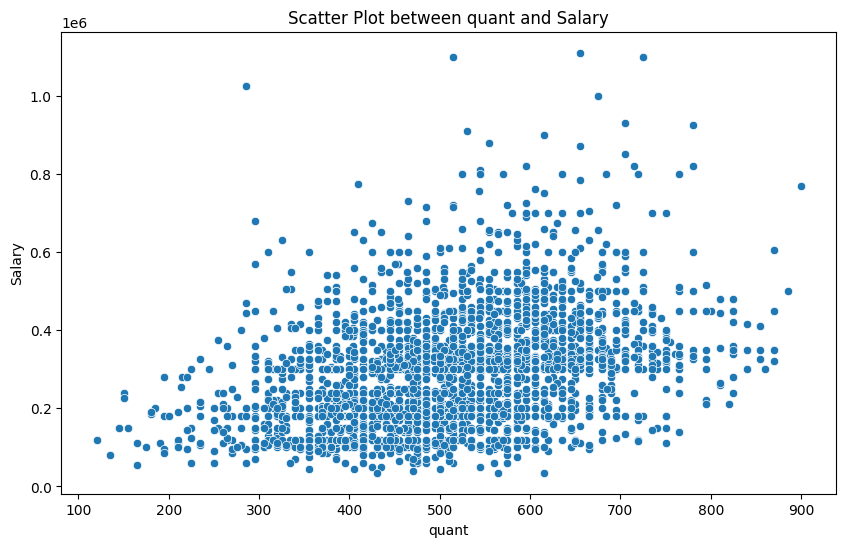

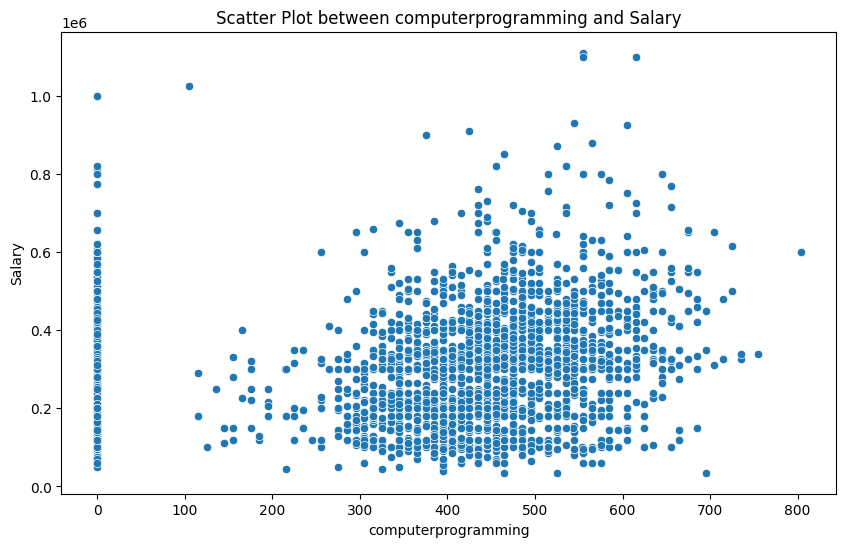

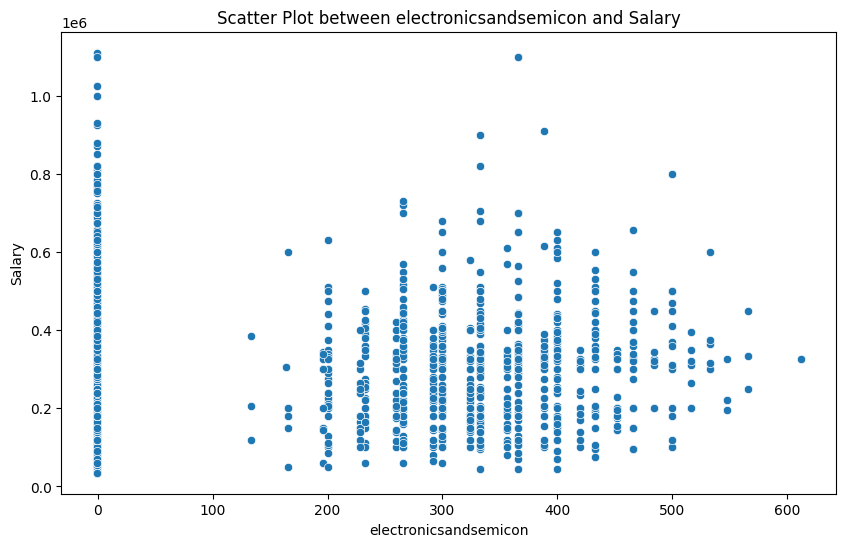

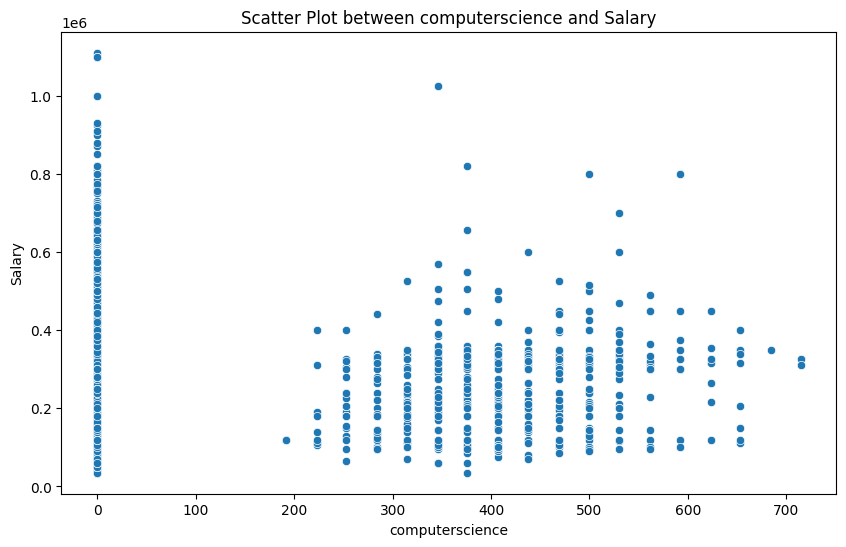

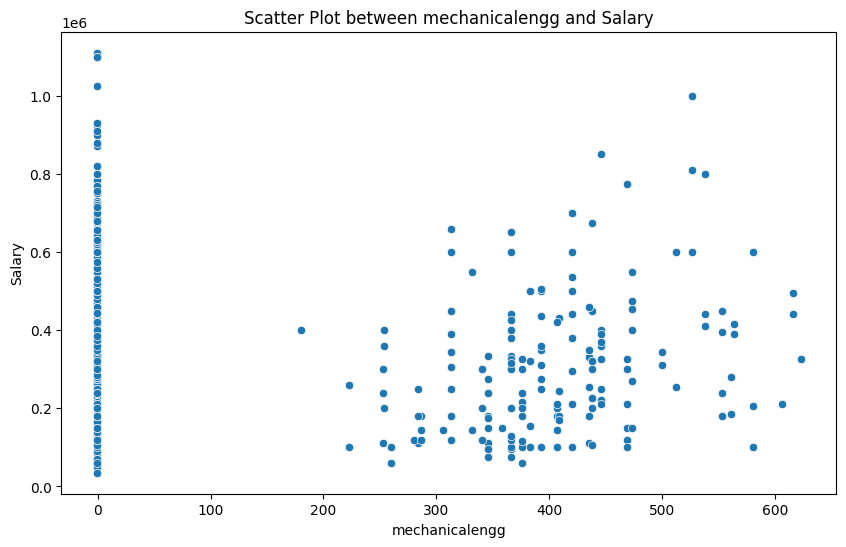

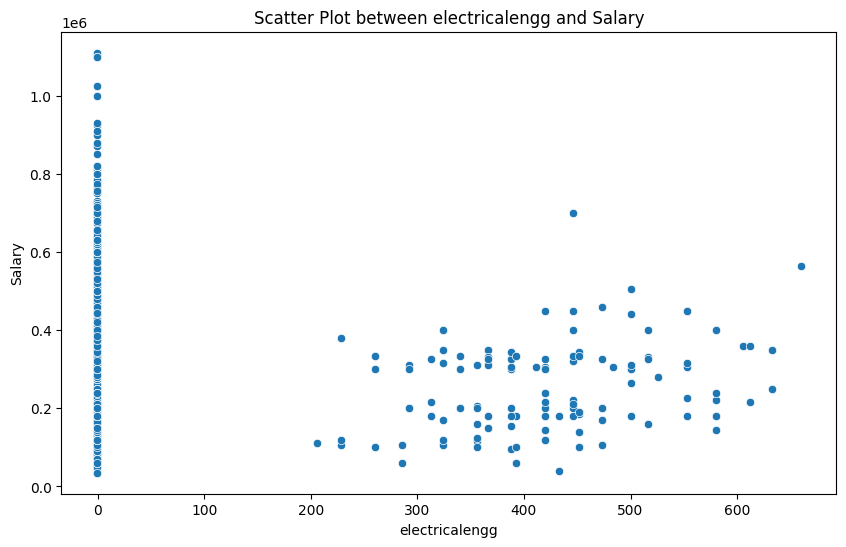

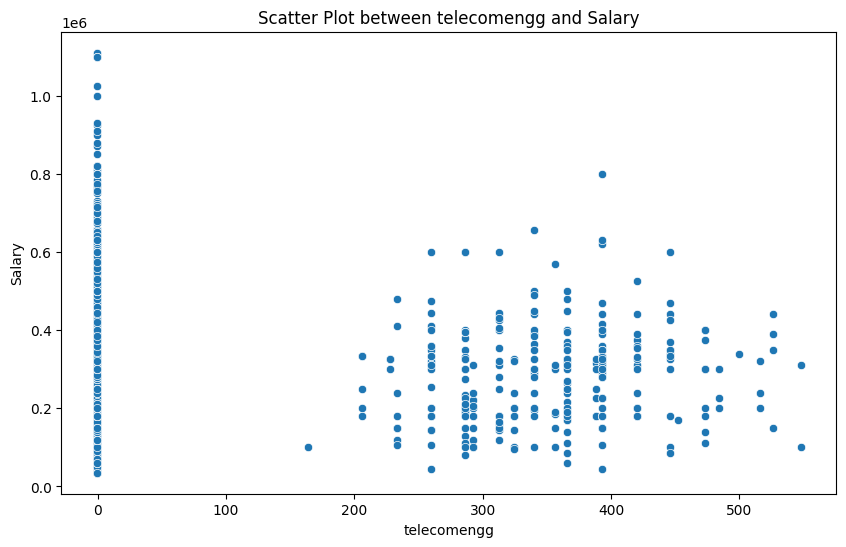

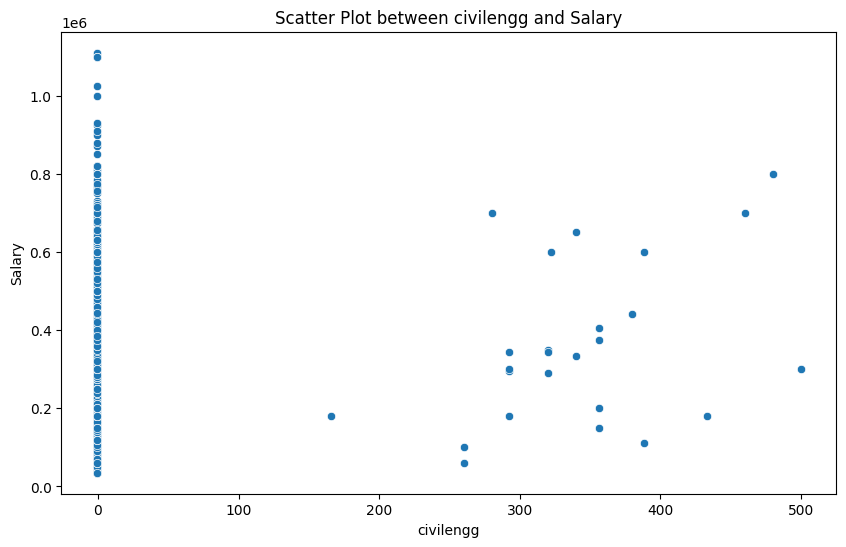

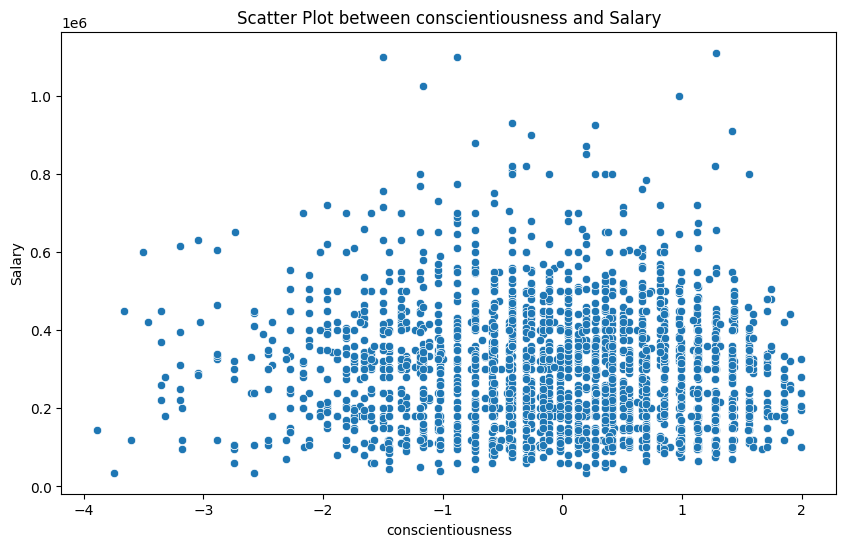

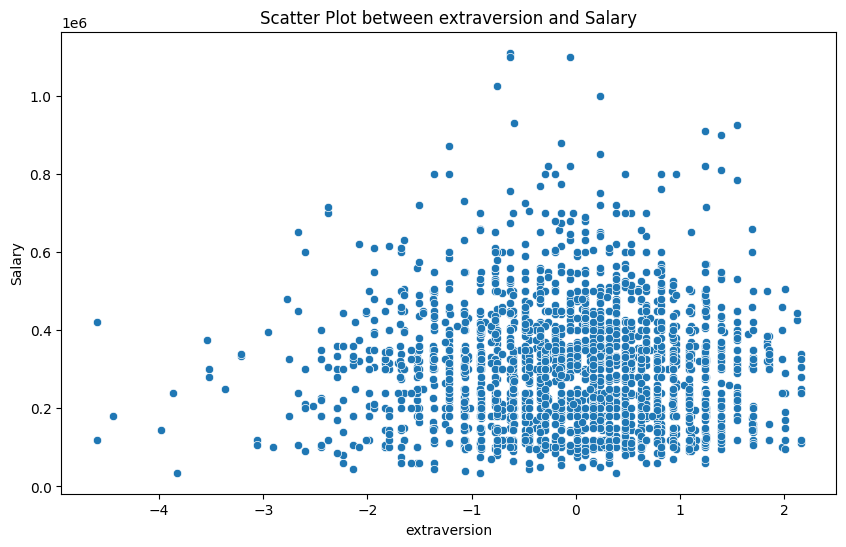

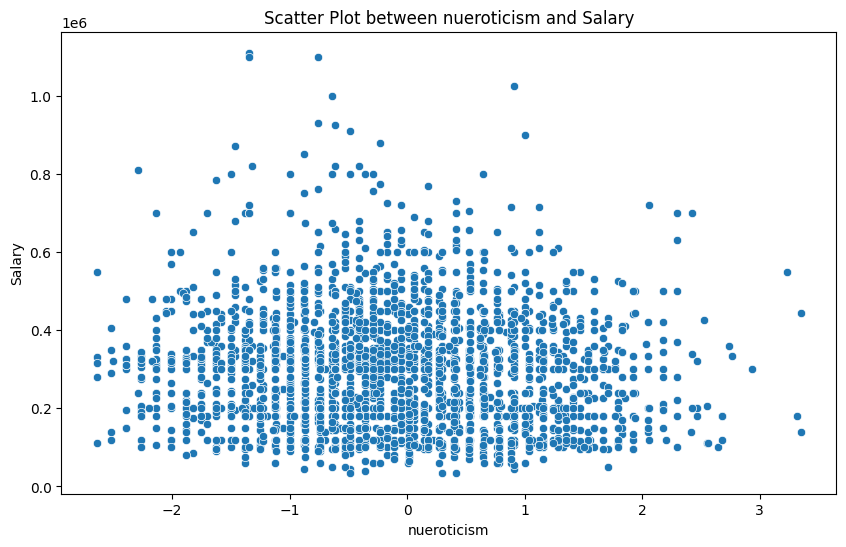

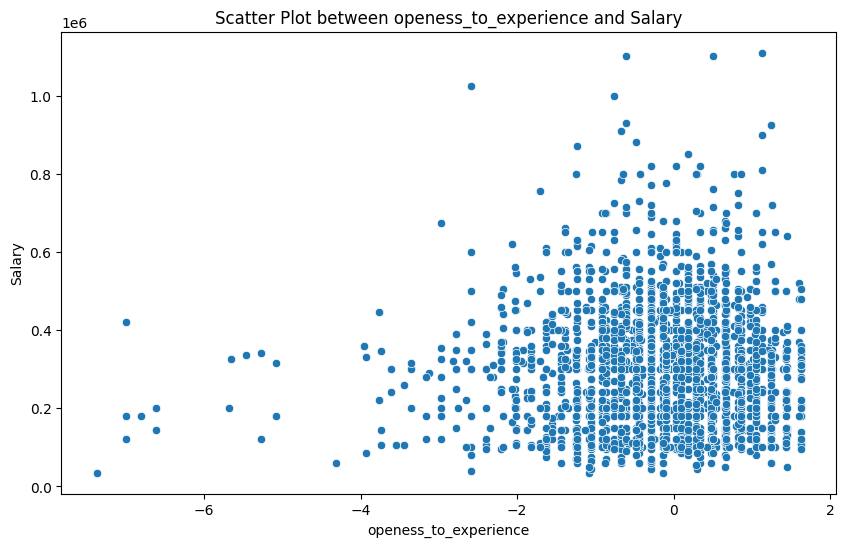

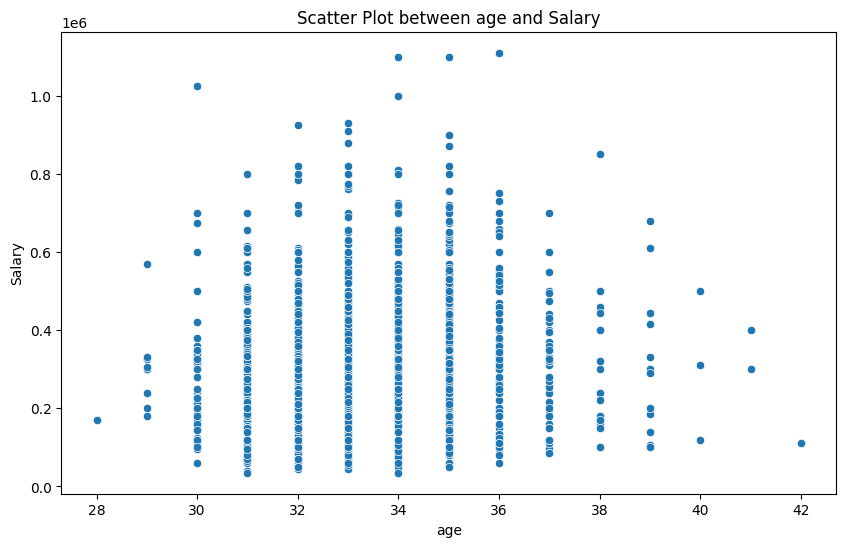

In [41]:
df_numeric = df.select_dtypes(include=[np.number]).drop('salary', axis=1)

for column in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column], y=df['salary'])
    plt.title(f"Scatter Plot between {column} and Salary")
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.show()

### 5. Prepare Data

intital preprocesing

In [82]:
def clean_and_preprocess_df(df_treated):
    df_processing = df_treated.copy()

    # Change datatype
    df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)

    # Calculate age column
    df_processing['dob'] = pd.to_datetime(df_processing['dob'])
    df_processing['age'] = df_processing['dob'].apply(
        lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day))
    )


    # Drop features outliers
    df_processing = df_processing[(df_processing['collegegpa'] >= 20) & (df_processing['domain'] >= 0)]

    #Filtering outliers in the target variable
    target = 'salary'
    df_processing['z_score'] =zscore(df_processing[target])

    df_processing = df_processing[(df_processing['z_score'].abs() <= 4)].drop('z_score', axis=1)


    # Droping columns
    df_processing.drop(columns=['id', 'dob', 'collegeid', 'collegecityid', '12graduation', 'graduationyear','collegetier','domain', 'agreeableness', 'civilengg'], inplace=True)

    #Feature scaling and transforming

    # Min Max Scaler
    numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns.drop('salary')
    scaler = MinMaxScaler()
    df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])

    # One hot encoding
    dummies_df = pd.get_dummies(df_processing[['gender', 'specialization', 'collegecitytier']], drop_first=True).astype(int)
    df_processing = pd.concat([df_processing, dummies_df], axis=1)
    df_processing.drop(['gender', 'specialization', 'collegecitytier'], axis=1, inplace=True)

    # Ordinal Indexing
    degree_mapping = {'B.Tech/B.E.': 0, 'M.Tech./M.E.': 1, 'MCA': 2}
    df_processing['degree'] = df_processing['degree'].map(degree_mapping)

    df_processing.replace(-1, 0)

    return df_processing


In [83]:
def filter_and_add_columns(df, columns_list):

    df_filtered = df.copy()


    # Identify columns that are in the list but not in the DataFrame
    missing_columns = [col for col in columns_list if col not in df_filtered.columns]

    # Add missing columns filled with 0
    for col in missing_columns:
        df_filtered[col] = 0

    # Filter the DataFrame to keep only those columns that are in the list
    df_filtered = df_filtered[[col for col in df_filtered.columns if col in columns_list]]
    # Filter dataframe
    df_filtered = df_filtered[columns_list]
    return df_filtered

### 6. Split Dataset

In [84]:
id_list =df_test.id.to_list() +df_val.id.to_list()
unique = set(id_list)
unique_list = list(unique)
df_train = df_train[~df_train['id'].isin(unique_list)]

In [85]:
df_model = clean_and_preprocess_df(df_train)
df_model_val = clean_and_preprocess_df(df_val)
df_model_test = clean_and_preprocess_df(df_test)

In [86]:
X_train = df_model.drop('salary', axis=1)
columns= X_train.columns

X_val = filter_and_add_columns(df_model_val.drop('salary', axis=1),columns)
X_test = filter_and_add_columns(df_model_test.drop('salary', axis=1),columns)

y_train = df_model['salary']
y_val = df_model_val['salary']
y_test = df_model_test['salary']

### 7. Baseline Model

In [87]:
y_mean = y_train.mean()
y_central = np.full(y_train.shape, y_mean)
y_central_val = np.full(y_val.shape, y_mean)
y_central_test = np.full(y_test.shape, y_mean)

In [88]:
train_perf = mean_squared_error(y_train, y_central, squared=False)
valid_perf = mean_squared_error(y_val, y_central_val, squared=False)
test_perf = mean_squared_error(y_test, y_central_test, squared=False)

print('train_perf: ', train_perf)
print('valid_perf: ', valid_perf)
print('test_perf: ', test_perf)


train_perf:  145254.93125223106
valid_perf:  144659.12515866497
test_perf:  142335.69088071826


### 8. Train Machine Learning Model

In [89]:
model =Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [90]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

model_train_perf = mean_squared_error(y_train, y_pred_train, squared=False)
model_valid_perf = mean_squared_error(y_val, y_pred_val, squared=False)
model_test_perf = mean_squared_error(y_test, y_pred_test, squared=False)

print('train_perf: ', model_train_perf)
print('valid_perf: ', model_valid_perf)
print('test_perf: ', model_test_perf)

train_perf:  122444.21883986633
valid_perf:  125644.26556565239
test_perf:  124887.70197700958


#### 8. Tuning Machine Learning Model

In [77]:
alpha_range = np.logspace(-4, 4, 50)
best_mse = float('inf')
best_alpha = None

for alpha in alpha_range:
    model = Ridge(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha for Ridge:", best_alpha)
print("Best MSE on the validation set:", best_mse)

Best alpha for Ridge: 3.727593720314938
Best MSE on the validation set: 15496919828.619915


In [78]:
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

Ridge(alpha=3.727593720314938)

In [79]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

### 9. Assess Model Performance

In [80]:
model_train_perf = mean_squared_error(y_train, y_pred_train, squared=False)
model_valid_perf = mean_squared_error(y_val, y_pred_val, squared=False)
model_test_perf = mean_squared_error(y_test, y_pred_test, squared=False)

In [81]:
print('train_perf: ', model_train_perf)
print('valid_perf: ', model_valid_perf)
print('test_perf: ', model_test_perf)

train_perf:  123334.58500562537
valid_perf:  124486.62509932509
test_perf:  124618.32760500783


In [56]:
import altair as alt

In [57]:
# Solution
perfect = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

In [58]:
# Solution
pred_chart = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_pred_train})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart + perfect

alt.LayerChart(...)